<h1> <a href=http://www.datascience-paris-saclay.fr/>Paris Saclay Center for Data Science</a> </h1>

<h2> RAMP on charged particle tracking in 2D with a possible future LHC Silicon detector </h2>

<i> Thomas Boser (CHALEARN), Mikhail Hushchyn (YSDA/Russia), Balázs Kégl (LAL/Orsay), David Rousseau (LAL/Orsay), Yetkin Yılmaz (LAL/Orsay) </i>

<h2> Introduction </h2>

<p> 

<p>The main objective is to achive the optimal assignment of each hit to a track id.



### Requirements

* numpy>=1.10.0  
* matplotlib>=1.5.0 
* pandas>=0.17.0  
* scikit-learn>=0.17 (different syntaxes for v0.17 and v0.18)  

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Exploratory data analysis

### Loading the data

In [2]:
filename = "public_train.csv"
df = pd.read_csv(filename)

The data consists of the following columns:
event_id, cluster_id, layer, iphi, x, y

In [3]:
df

,event_id,cluster_id,layer,iphi,x,y
0,0,1,6,67181,535.840039,-169.468147
1,0,2,7,22631,65.319563,759.195202
2,0,4,1,8368,-66.070384,53.476203
3,0,1,7,91140,727.313411,-227.286608
4,0,2,4,16216,20.268475,270.240983
5,0,3,2,37015,147.466204,-47.735927
6,0,6,0,5132,-38.573229,-5.753784
7,0,9,3,4338,185.982644,103.824160
8,0,9,8,10655,861.414226,507.903073
9,0,9,5,4177,352.333427,199.715188


In [4]:
y = df.drop(['layer','iphi','x','y'], axis=1).values
X = df.drop(['cluster_id'], axis=1).values

(particle ids are shifted by 1000 times the event id, in order to make them unique across the dataset)

In [5]:
len(X)

7559411

### Looping over events

In [6]:
y_events = y[:,0]

In [7]:
events = np.unique(y_events)

### Visualize the hits in a single event

In [13]:
ievent = 1
event_indices = X[:,0]==ievent
X_event = X[event_indices,1:]
pixelx = X_event[:,2]
pixely = X_event[:,3]
particles = y[event_indices][:,1]

#### Hits from all particles

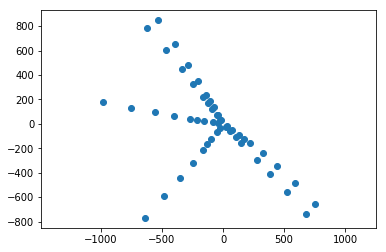

In [14]:
plt.scatter(pixelx,pixely)
plt.axis('equal')
plt.show()

This is what the algorithm will see.

#### Hits from a single particle

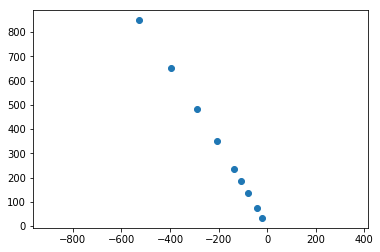

In [16]:
iparticle = 2
hits_particle = (particles == iparticle)
plt.scatter(pixelx[hits_particle],pixely[hits_particle])
plt.axis('equal')
plt.show()

So, ideally, our algorithm wants to assign specific ids to all hits in a way that corresponds to the particle. The perfect algorithm will split the event into various tracks:

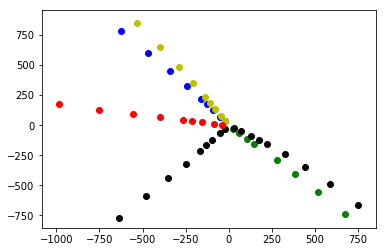

In [17]:
cmap = ['k','b','y','g','r','k','b']
for iparticle in np.unique(particles):
    hits_particle = (particles == iparticle)
    plt.scatter(pixelx[hits_particle],pixely[hits_particle],color=cmap[int(iparticle) % 7])
plt.show()

### Matching the hits together

Choose the tracking class that you want to use
(in the submission, it has to be named HitToTrackAssignment in clusterer.py)

In [19]:
from clusterer import Clusterer
tracker = Clusterer(0.8)

#### Training the algorithm

In [20]:
tracker.fit(X, y)

#### Running the algorithm to reconstruct the tracks in data
This will take some time to go through all events

In [ ]:
y_true = y
y_predicted = tracker.predict(X)

Let's compare how well the tracks corresponds to the particles

In [ ]:
df_result = pd.DataFrame({'particle':y_true[event_indices,0],'track':y_predicted[event_indices]}).sort('particle')
df_result

In [ ]:
tracks = y_predicted[event_indices]

In [ ]:
cmap = ['k','b','y','g','r']
for itrack in np.unique(tracks):
    if itrack >= 0:
        hits_track = (tracks == itrack)
        plt.scatter(pixelx[hits_track],pixely[hits_track],color=cmap[int(itrack) % 5])
plt.show()

In [ ]:
cmap = ['k','b','y','g','r']
itrack = -1
hits_track = (tracks == itrack)
plt.scatter(pixelx[hits_track],pixely[hits_track],color=cmap[int(itrack) % 5])
plt.show()

### Scoring the assignment

The score function measures the fraction of hits with good track assignment

In [ ]:
def score_function(y_true, y_pred):
    '''Compute a clustering score.

    Cluster ids should be nonnegative integers. A negative integer
    will mean that the corresponding point does not belong to any
    cluster.

    We first identify assigned clusters by taking the max count of 
    unique assigned ids for each true cluster. We remove all unassigned
    clusters (all assigned ids are -1) and all duplicates (the same
    assigned id has majority in several true clusters) except the one
    with the largest count. We add the counts, then divide by the number
    of events. The score should be between 0 and 1. 

    Parameters
    ----------
    y_true : np.array, shape = (n, 2)
        The ground truth.
        first column: event_id
        second column: cluster_id
    y_pred : np.array, shape = (n, 2)
        The predicted cluster assignment.
        first column: event_id
        second column: predicted cluster_id
    """
    '''
    score = 0.
    event_ids = y_true[:, 0]
    y_true_cluster_ids = y_true[:, 1]
    y_pred_cluster_ids = y_pred

    unique_event_ids = np.unique(event_ids)
    for event_id in unique_event_ids:
        event_indices = (event_ids==event_id)
        cluster_ids_true = y_true_cluster_ids[event_indices]
        cluster_ids_pred = y_pred_cluster_ids[event_indices]

        unique_cluster_ids = np.unique(cluster_ids_true)
        n_cluster = len(unique_cluster_ids)
        n_sample = len(cluster_ids_true)

        # assigned_clusters[i] will be the predicted cluster id
        # we assign (by majority) to true cluster i 
        assigned_clusters = np.empty(n_cluster, dtype='int64')
        # true_positives[i] will be the number of points in 
        # predicted cluster[assigned_clusters[i]]
        true_positives = np.full(n_cluster, fill_value=0, dtype='int64')
        for i, cluster_id in enumerate(unique_cluster_ids):
            # true points belonging to a cluster
            true_points = cluster_ids_true[cluster_ids_true == cluster_id]
            # predicted points belonging to a cluster
            found_points = cluster_ids_pred[cluster_ids_true == cluster_id]
            # nonnegative cluster_ids (negative ones are unassigned)
            assigned_points = found_points[found_points >= 0]
            # the unique nonnegative predicted cluster ids on true_cluster[i]
            n_sub_cluster = len(np.unique(assigned_points))
            # We find the largest predicted cluster in the true cluster.
            if(n_sub_cluster > 0):
                # sizes of predicted assigned cluster in true cluster[i]
                predicted_cluster_sizes = np.bincount(
                    assigned_points.astype(dtype='int64'))
                # If there are ties, we assign the tre cluster to the predicted
                # cluster with the smallest id (combined behavior of np.unique
                # which sorts the ids and np.argmax which returns the first 
                # occurence of a tie).
                assigned_clusters[i] = np.argmax(predicted_cluster_sizes)
                true_positives[i] = len(
                    found_points[found_points == assigned_clusters[i]])
            # If none of the assigned ids are positive, the cluster is unassigned
            # and true_positive = 0
            else:
                assigned_clusters[i] = -1
                true_positives[i] = 0

        # resolve duplicates and count good assignments
        sorted = np.argsort(true_positives)
        true_positives_sorted = true_positives[sorted]
        assigned_clusters_sorted = assigned_clusters[sorted]
        good_clusters = assigned_clusters_sorted >= 0
        for i in range(len(assigned_clusters_sorted) - 1):
            assigned_cluster = assigned_clusters_sorted[i]
            # duplicates: only keep the last count (which is the largest
            # because of sorting)
            if assigned_cluster in assigned_clusters_sorted[i+1:]:
                good_clusters[i] = False
        n_good = np.sum(true_positives_sorted[good_clusters])
        score += 1. * n_good / n_sample
    score /= len(unique_event_ids)
    return score


In [ ]:
len(y_events)

In [ ]:
y_test = np.zeros((len(y_events),2))
y_pred = np.zeros((len(y_events),2))

y_test = y_true

y_pred[:,1] = y_events
y_pred[:,0] = y_predicted

score(y_test,y_pred)

Check the score of a single event, 
if you want to debug what's happening in that event

In [ ]:
score(y_test[y_test[:,0]==ievent],y_pred[y_test[:,0]==ievent])

### Fitting the tracks (beyond the challenge)